# ANALISIS DE EDA
El estudio que se va a realizar, es de un libro de excel que posee 15 hojas, llamado"Internet.xlsx", de las cuales se analizo cada una de ellas, y se separaron solo 7 hojas y ademas tambien se analizo el archivo llamado "mapa_conectividad.xlsx", la cual posee coordenadas y otros datos.
De estos dos archivos se va a hacer los estudios pertinentes relacionados al ANALISIS DE EXTRACCION DE DATOS.

En la etapa realizada anteriormente la de ETL, se dejo, los datos limpios para poder comenzar a analizar, y encontrar valores atipicos "outliers" que pueden o no ser errores, ademas buscar relaciones que pueden existir entre cada una de las hojas o archivos de datos "DATAFRAME", tambien analizar o buscar patrones que puedan favorecer a la toma de desiciones.


Importamos las librerias que vamos a utilizar para el analisis de EDA.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import datetime

Cargamos la hoja almacenada como archivo "csv", llamada "Hoja2_Vel_SinRango.csv" y mostramos los primeros datos.

In [2]:
hoja2_graf=pd.read_csv("Hoja2_Vel_SinRango.csv",sep = ',')
hoja2_graf.isnull().sum() # Muestra los valores nulos por columna
print(hoja2_graf.head(1))
hoja2_graf.shape # Nos muestra la tupla (filas, columnas)

        Fecha   Año  Trimestre     Provincia   Otros  veloc_muyBaja  \
0  2024-01-01  2024          1  Buenos Aires  125147         111748   

   veloc_baja  veloc_media  veloc_alta  veloc_muyAlta  
0      391174      1067259     1472665        1876564  


(624, 10)

# SEGUNDA HOJA
Como los datos de Provincias, ya estan estandarizados, o sea sin espacio adelante ni atras, no hay datos duplicados y datos nulos, se puede trabajar con este DATAFRAME.

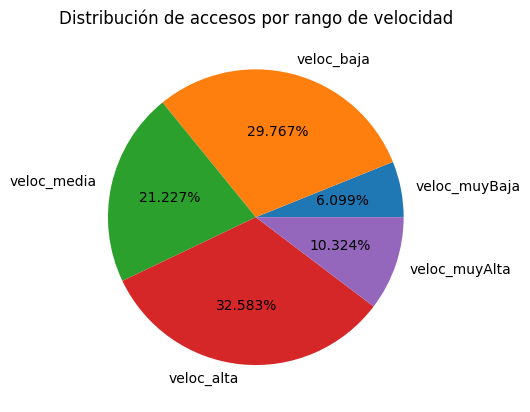

In [3]:
import matplotlib.pyplot as plt
hoja2_graf[['veloc_muyBaja', 'veloc_baja', 'veloc_media', 'veloc_alta', 'veloc_muyAlta']].sum().plot(kind='pie', autopct='%1.3f%%')
plt.title('Distribución de accesos por rango de velocidad')
plt.show()

## Observaciones - segunda hoja (Velocidad sin rango)
Esta observacion, y distribucion de velocidades, la hice de acuerdo a lo que se vee aca en mi provincia "SALTA".

Lo que se puede observar de este grafico es que las velocidades que mas porcentaje maneja son la "<b>velocidades bajas</b> desde 0.256 Mbps a 3 Mbps" con casi el 30 % del total.

Estudio a tener en cuenta ya que es un ancho de banda muy bajo y que hoy en dia no se puede ni ver videos con esta velocidad.

La otra "<b>velocidad es la alta</b> desde 31 Mbps a 100 Mbps" con mas del 30 % del total. Esta es la velocidad que hoy en dia la mayoria de las personas necesitan en un hogar, para realizar distintas actividades con una familia tipo y como 5 a 10 dispositivos dentro de la misma.


# CUARTA HOJA 
Vamos a analizar, que conclusion podemos sacar de esta hoja, lo que se vio es que no posee datos nulos, en el proceso del ETL.
ademas se limpio y se creo un indice del tipo fecha, para poder indexar los datos. de acuerdo a un año y un trimestre.


En esta hoja vamos a anilizar el promedio de bajada por provincia, en un cierto año y trimestre.
para eso utilizaremos la media que sacamos por cada dato.


In [4]:
hoja4_graf=pd.read_csv("Hoja4_Veloc%_por_prov.csv",sep = ',')
hoja4_graf.isnull().sum() # Se eliminan datos nulos
print(hoja4_graf.head(1))
hoja4_graf.shape # Nos muestra la tupla (filas, columnas)

        Fecha   Año  Trimestre     Provincia  Mbps (Media de bajada)
0  2024-01-01  2024          1  Buenos Aires                  159.13


(984, 5)

In [5]:
media_por_prov = hoja4_graf.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()

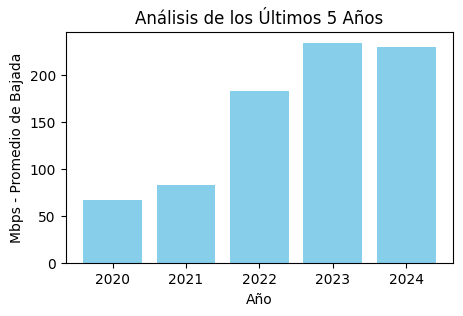

In [6]:
ultimos_5 = hoja4_graf[hoja4_graf['Año'] >= hoja4_graf['Año'].max() - 4]
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(ultimos_5['Año'], ultimos_5['Mbps (Media de bajada)'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Mbps - Promedio de Bajada')
plt.title('Análisis de los Últimos 5 Años')

# Mostrar el gráfico
plt.show()

## Primera Observación - Cuarta hoja (Velocidad de bajada por provincia)
Se hace un estudio de los 5 ultimos año debido a que antes del 2020, el promedio de ancho de banda era muy bajo en todas las provincias.

En los graficos de barra se obserba que los dos ultimos años hubo un incremento de mas de la mitad de los años 2020 y 2021, y como todabia no se termino este año, todabia no se podria dar bien un analisis verdadero del mismo.

Tambien podriamos hacer un analisis, relacionado con todas las provincias, y ver su promedio de bajada.
Pero como la cantidad de las provincias son muchas y ademas son varios los años que tenemos como datos, entonces vamos a filtrar los 3 ultimos años.

Para eso vamos a crear una funcion, que nos separe 3 años (2022,2023,2024).

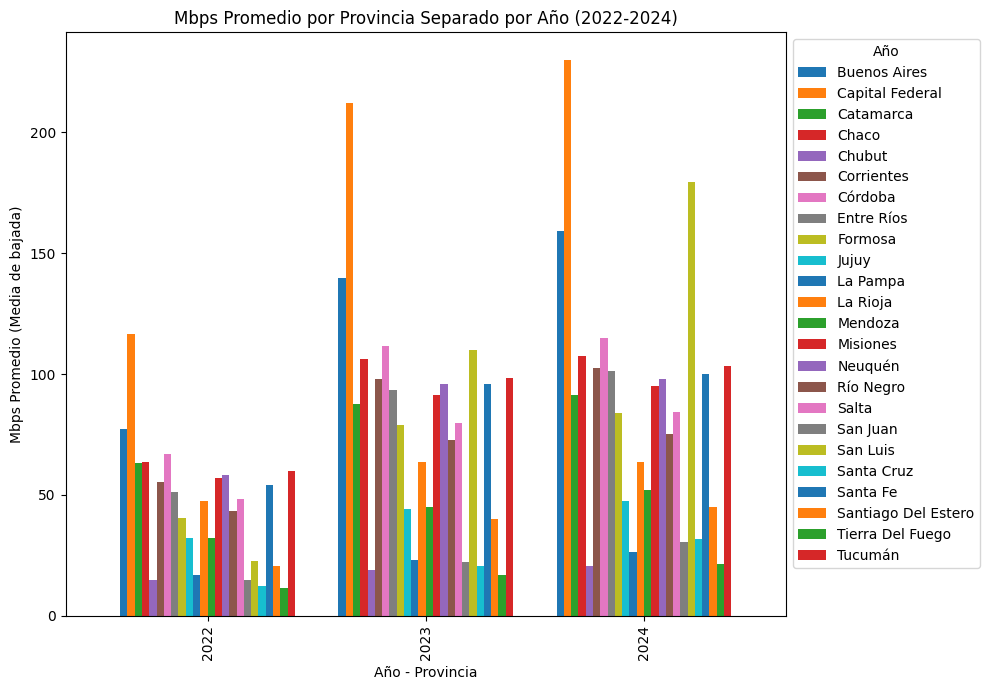

In [49]:
df_ult_3 = hoja4_graf[hoja4_graf['Año'] >= hoja4_graf['Año'].max() - 2]
promedio_por_provincia_ano = df_ult_3.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(10, 7),width=0.8)
# Configurar la leyenda fuera del gráfico, en la parte derecha
plt.title('Mbps Promedio por Provincia Separado por Año (2022-2024)')
plt.xlabel('Año - Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año', bbox_to_anchor=(1, 1), loc='upper left')
# Ajustar el layout para que se acomode todo correctamente
plt.tight_layout()
# Mostrar el gráfico
plt.show()

## Segunda Observación - Cuarta hoja 
En el grafico de barra se puede observar, que las provincia que se mantiene como lideres son (Capital Federal, Buenos Aires, Cordoba), y tambien se puede ver que la provincia de San Luis, crecio mucho los dos ultimos años y que las provincias de menos crecimiento son (Tierra del Fuego y Chubut, La Pampa) o sea que son las provincia que mas necesitan inversion en el sector de telecomunicaciones con respecto al internet.

# SEPTIMA HOJA
En esta hoja tenemos datos muy interesantes como todas las tecnologias de comunicaciones que son 
(ADSL, WIRELESS, FIBRA, CABLEMODEM, OTROS ), que tienen cada provincia. y tambien tenemos el total de la misma, a este dataframe, tambien se le creo un indice con respecto a la fecha. Para poder asociarlos con otros datos o tambien poder crear datos calculados o medidas con respecto a fecha.

In [10]:
hoja7_graf=pd.read_csv("Hoja7_Accesos por Tecnologia.csv",sep = ',')
print(hoja7_graf.head(1))
hoja7_graf.shape # Nos muestra la tupla (filas, columnas)
hoja7_graf.isnull().sum()


        Fecha     Año  Trimestre     Provincia      ADSL  Cablemodem  \
0  2024-01-01  2024.0        1.0  Buenos Aires  203297.0   2790663.0   

   Fibra óptica  Wireless     Otros      Total  
0     1799013.0  150290.0  101294.0  5044557.0  


Fecha           1
Año             1
Trimestre       1
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

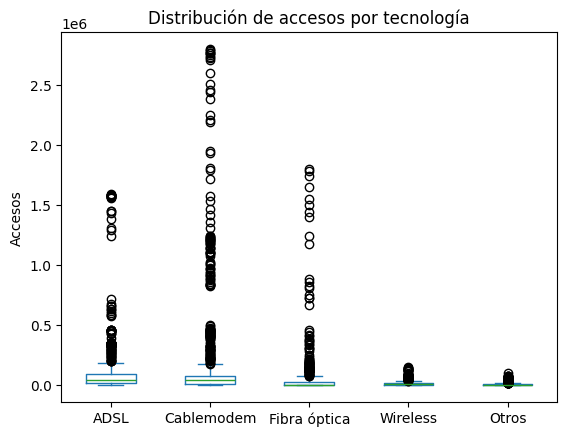

In [20]:
hoja7_graf[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='box')
plt.title('Distribución de accesos por tecnología')
plt.ylabel('Accesos')
plt.show()

Debido a que el año 2024, todabia no termino, y no seria bueno hacer un analisis exautivo con respecto a este año, se va a elejir el año 2023, para ver cada una de las tecnologias empleadas en ese año.

Y hace el analisis de cada una de ellas respecto de su grafica. Para eso vamos a utilizar, grafico de barra o histogramas.


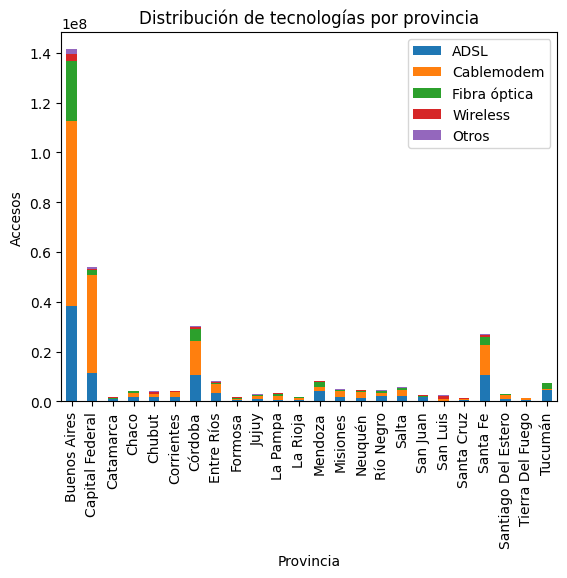

In [18]:
hoja7_graf.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot(kind='bar', stacked=True)
plt.title('Distribución de tecnologías por provincia')
plt.ylabel('Accesos')
plt.show()

En la grafica se estudio la distribucion de tecnologias, por provincia y se observo que la tecnologia que mas se usa es el "cablemodem", luego es el "ADSL", y como tercera tecnologia "Fibra Optica".

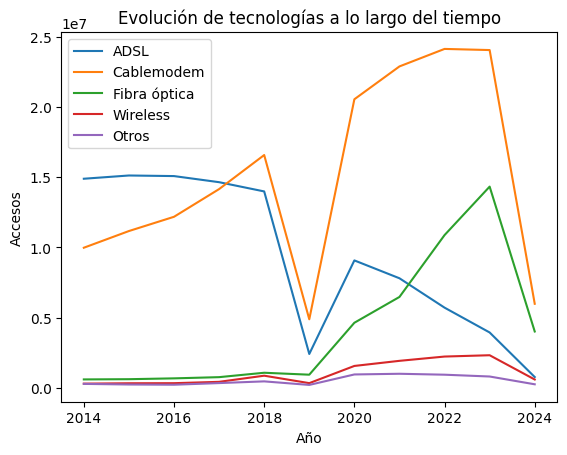

In [19]:
hoja7_graf.groupby(['Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot(kind='line')
plt.title('Evolución de tecnologías a lo largo del tiempo')
plt.ylabel('Accesos')
plt.show()

En la grafica de lineas, se observa de que entre los año 2018 y 2020, hay una baja considerable de la evolucion de las tecnologias esto baja se puede deber a que el pais estaba inestable economicamente, y la suba continua se da desde el 2019, donde tambien tiene que ver la relacion al tiempo de pandemia donde era la unica manera de estar conectados.

Tambien se puede ver que las tecnologias que estan creciendo continuamente en primer lugar es "cablemodem", luego "Fibra Optica" y el "ADSL".

Tambien al ultimo se vee una caida, en cada tecnologias, debido a que el año en estudio el 2024 solo se cargo un solo trimestre.

In [33]:
hoja8_graf=pd.read_csv("Hoja8_Penetracion Poblacion.csv",sep = ',')
print(hoja8_graf.head(1))
hoja8_graf.shape # Nos muestra la tupla (filas, columnas)
hoja8_graf.isnull().sum()
hoja8_graf.columns

        Fecha   Año  Trimestre     Provincia  Accesos por cada 100 hab
0  2024-01-01  2024          1  Buenos Aires                      27.8


(984, 5)

<Figure size 1000x600 with 0 Axes>

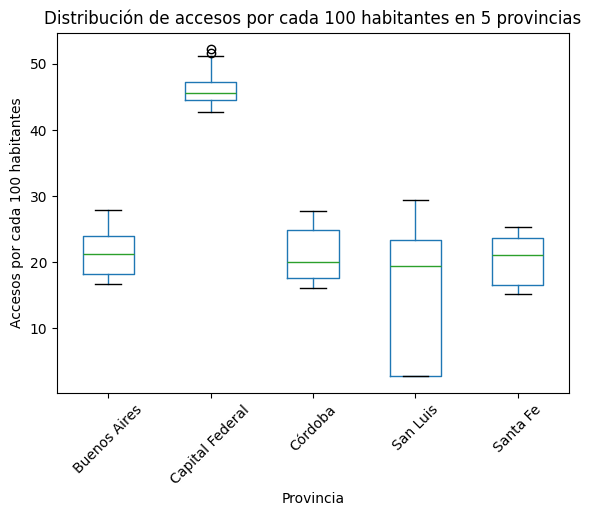

In [28]:
# Supongamos que tienes un DataFrame llamado df y las 5 provincias que quieres analizar
provincias_seleccionadas = ['Buenos Aires', 'Córdoba', 'Capital Federal', 'Santa Fe', 'San Luis']  # Ejemplo de provincias

# Filtrar el DataFrame para las provincias seleccionadas
df_filtrado = hoja8_graf[hoja8_graf['Provincia'].isin(provincias_seleccionadas)]

# Crear el boxplot para ver la distribución de 'Accesos por cada 100 hab' en estas provincias
plt.figure(figsize=(10, 6))
df_filtrado.boxplot(column='Accesos por cada 100 hab', by='Provincia', grid=False)
plt.title('Distribución de accesos por cada 100 habitantes en 5 provincias')
plt.suptitle('')  # Para quitar el título automático
plt.ylabel('Accesos por cada 100 habitantes')
plt.xlabel('Provincia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Sobre este grafico, se esta estudiando los posibles outliers que se pueden observar, y se vee que la distribucion de acceso cada 100 habitantes, en la provincia de CABA, es el principal dato.

Y tambien San Luis, que se observa que es una de las provincias que mas creecieron

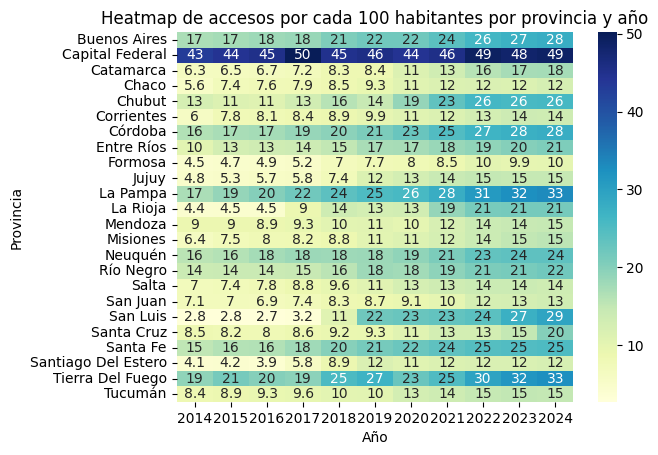

In [29]:
pivot = hoja8_graf.pivot_table(values='Accesos por cada 100 hab', index='Provincia', columns='Año', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu", annot=True)
plt.title('Heatmap de accesos por cada 100 habitantes por provincia y año')
plt.show()

En el grafico anterior se observa de que la provincia que mejor acceso cada 100 hab. es la CAPITAL FEDERAL, desde los 2014 al 2024.

Pero como los datos se enciman, vamos a hacer un mejor analisis, limitando el estudio y la grafica a solo los ultimos 5 años.

La pampa, San Luis, Tierra del Fuego, tambien se vee que estan teniendo una evolucion, ya que hay un crecimiento continuo en estas provincias, al igual y mas destadas Buenos Aires y Cordoba.


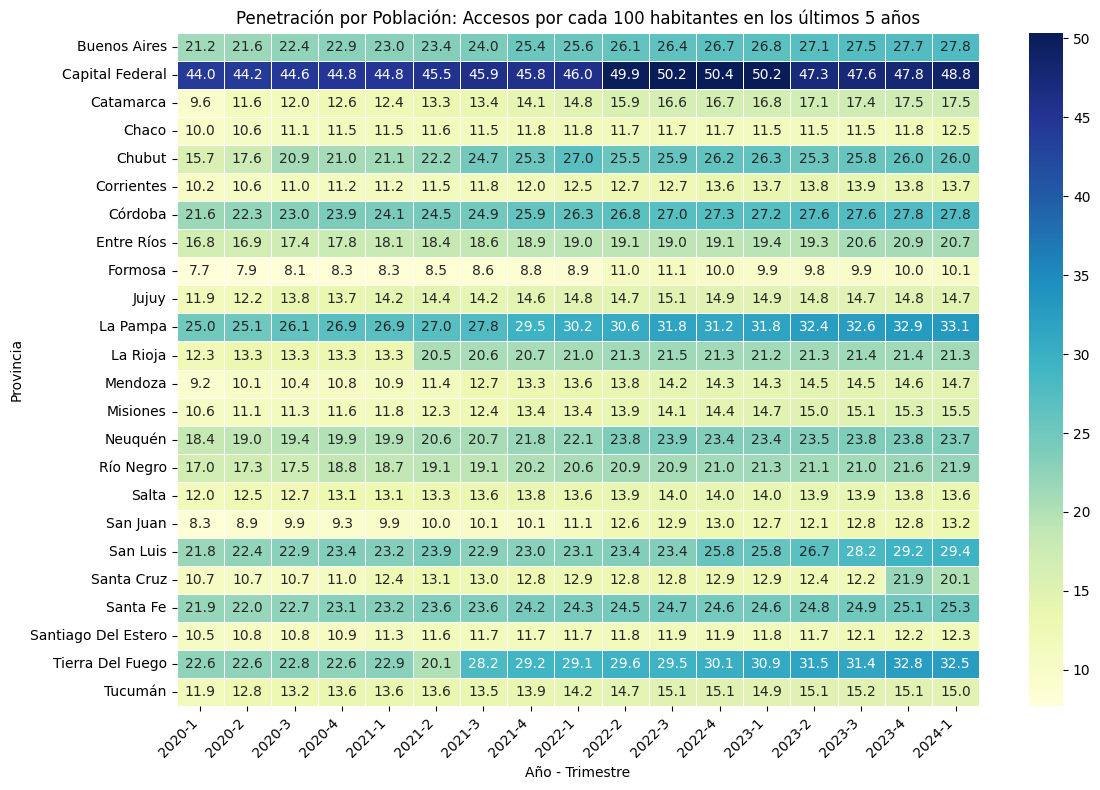

In [30]:
ultimo_ano = hoja8_graf['Año'].max()  # Obtén el año más reciente en el DataFrame
ultimos_5_anios = ultimo_ano - 5

df_filtrado = hoja8_graf[hoja8_graf['Año'] > ultimos_5_anios]

# Agrupar por año, trimestre y provincia para obtener la media de accesos por cada 100 habitantes
df_agrupado = df_filtrado.groupby(['Provincia', 'Año', 'Trimestre'])['Accesos por cada 100 hab'].mean().reset_index()

# Crear una tabla pivote para usar en el heatmap
tabla_pivote = df_agrupado.pivot_table(values='Accesos por cada 100 hab', index='Provincia', columns=['Año', 'Trimestre'])

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_pivote, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)

plt.title('Penetración por Población: Accesos por cada 100 habitantes en los últimos 5 años')
plt.ylabel('Provincia')
plt.xlabel('Año - Trimestre')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
plt.show()

In [34]:
hoja9_graf=pd.read_csv("Hoja9_Penetracion Hogares.csv",sep = ',')
print(hoja9_graf.head(1))
hoja9_graf.shape # Nos muestra la tupla (filas, columnas)
hoja9_graf.isnull().sum()
hoja9_graf.columns

        Fecha   Año  Trimestre     Provincia  Accesos por cada 100 hogares
0  2024-01-01  2024          1  Buenos Aires                          81.1


Index(['Fecha', 'Año', 'Trimestre', 'Provincia',
       'Accesos por cada 100 hogares'],
      dtype='object')

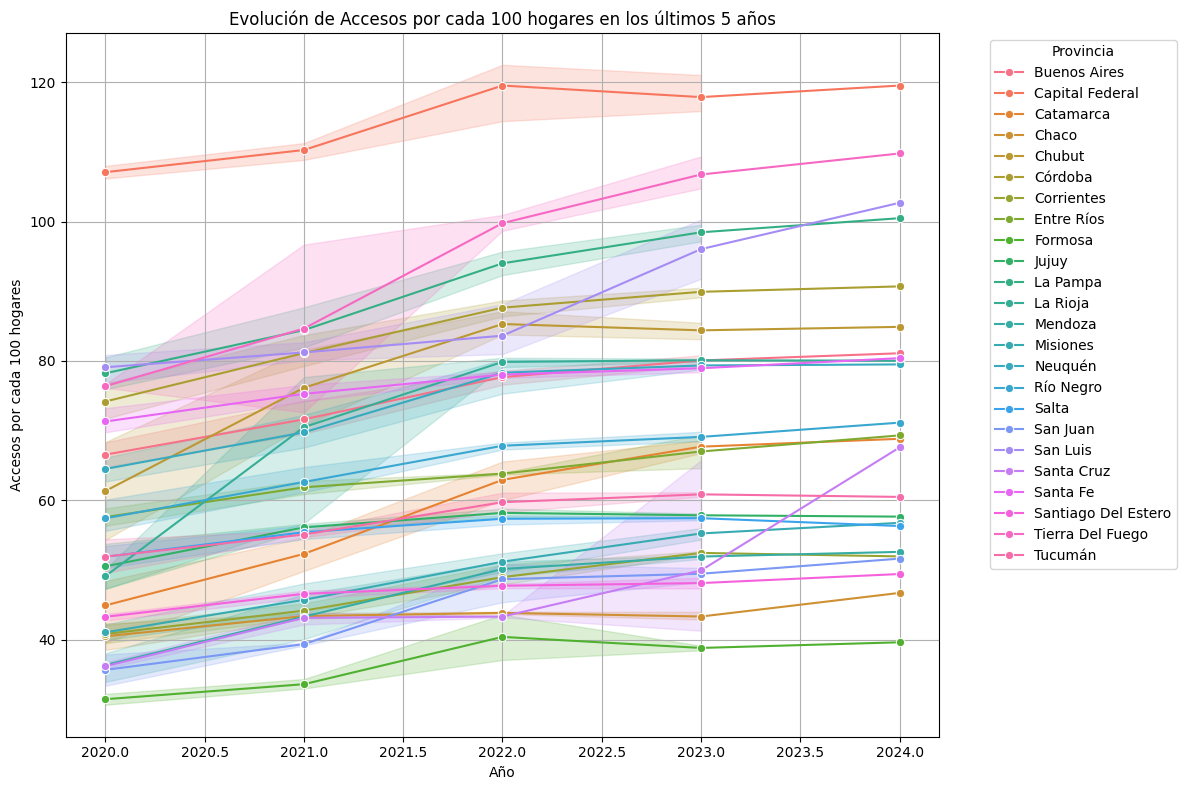

In [35]:
# Filtrar los últimos 5 años
ultimo_ano = hoja9_graf['Año'].max()
ultimos_5_anios = ultimo_ano - 5
df_filtrado =hoja9_graf[hoja9_graf['Año'] > ultimos_5_anios]

# Crear gráfico de líneas múltiples
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtrado, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')

plt.title('Evolución de Accesos por cada 100 hogares en los últimos 5 años')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

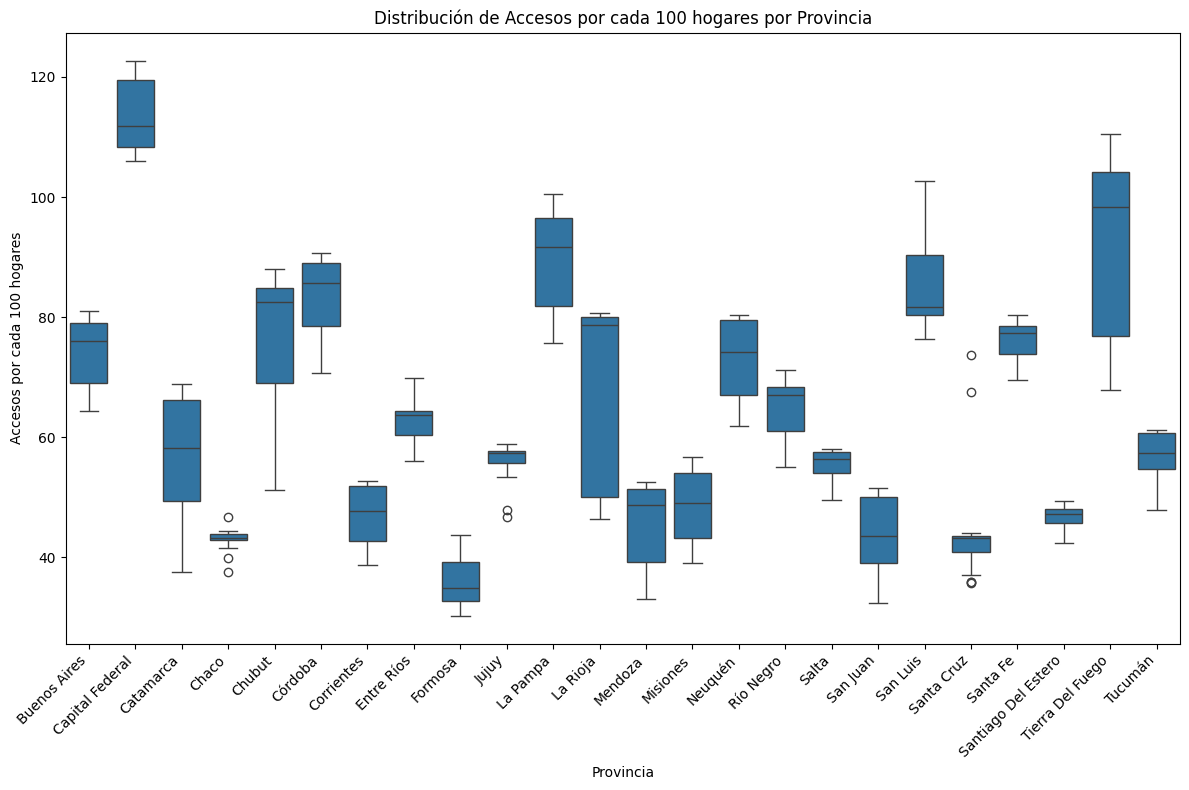

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtrado, x='Provincia', y='Accesos por cada 100 hogares')

plt.title('Distribución de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

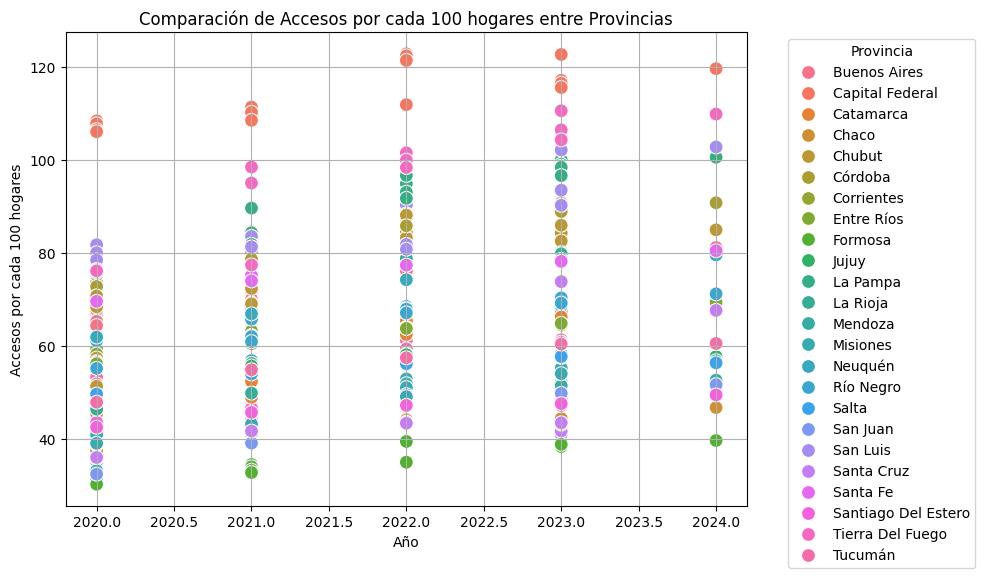

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', s=100)

plt.title('Comparación de Accesos por cada 100 hogares entre Provincias')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

El objetivo de utilizar un scatterplot en este análisis es observar y comparar cómo ha variado la penetración por cada 100 hogares entre diferentes provincias a lo largo del tiempo. Nos permite:

Comparar la penetración entre las provincias a través de los años.
Identificar patrones de penetración (crecimiento, decrecimiento o estancamiento) para cada provincia.
Observar diferencias significativas entre provincias.
Detectar agrupaciones o outliers (provincias que muestran comportamientos atípicos en comparación con el resto).

In [40]:
hoja12_graf=pd.read_csv("Hoja12_Accesos por Velocidad.csv",sep = ',')
print(hoja12_graf.head(1))
hoja12_graf.shape # Nos muestra la tupla (filas, columnas)
hoja12_graf.isnull().sum()
hoja12_graf.columns

        Fecha   Año  Trimestre     Provincia  HASTA 512 kbps  \
0  2024-01-01  2024          1  Buenos Aires         26002.0   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0              22510.0           221185.0            233225.0   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             241778.0             106418.0  4068292.0  125147.0  5044557.0  


Index(['Fecha', 'Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

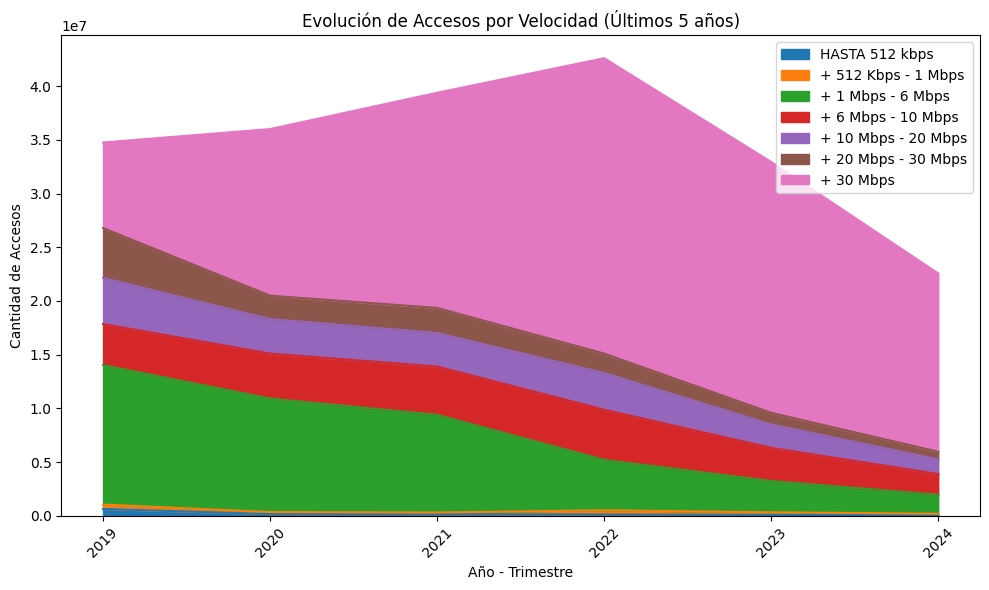

In [42]:
ultimo_ano = hoja12_graf['Año'].max()  
ultimos_5_anios = hoja12_graf[hoja12_graf['Año'] >= (ultimo_ano - 5)]

# Agrupar por año y trimestre, sumando accesos para cada velocidad
df_agrupado = ultimos_5_anios.groupby(['Año']).sum()

# Crear gráfico de áreas apiladas
df_agrupado[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
             '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].plot(kind='area', stacked=True, figsize=(10, 6))

plt.title('Evolución de Accesos por Velocidad (Últimos 5 años)')
plt.xlabel('Año - Trimestre')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el grafico de areas apiladas, se puede observar de que la velocidad mas solicitada o mas contratada es la de mayores a 30 mbps y tambien en segundo lugar es la de 1 mbps a 6 mbps.

Tambien se observa que desde el año 2019 al actual, en la mayoria de las velocidades hay un decaimiento de uso a diferencia con la de mas de 30 mbps que es la unica que aumento.

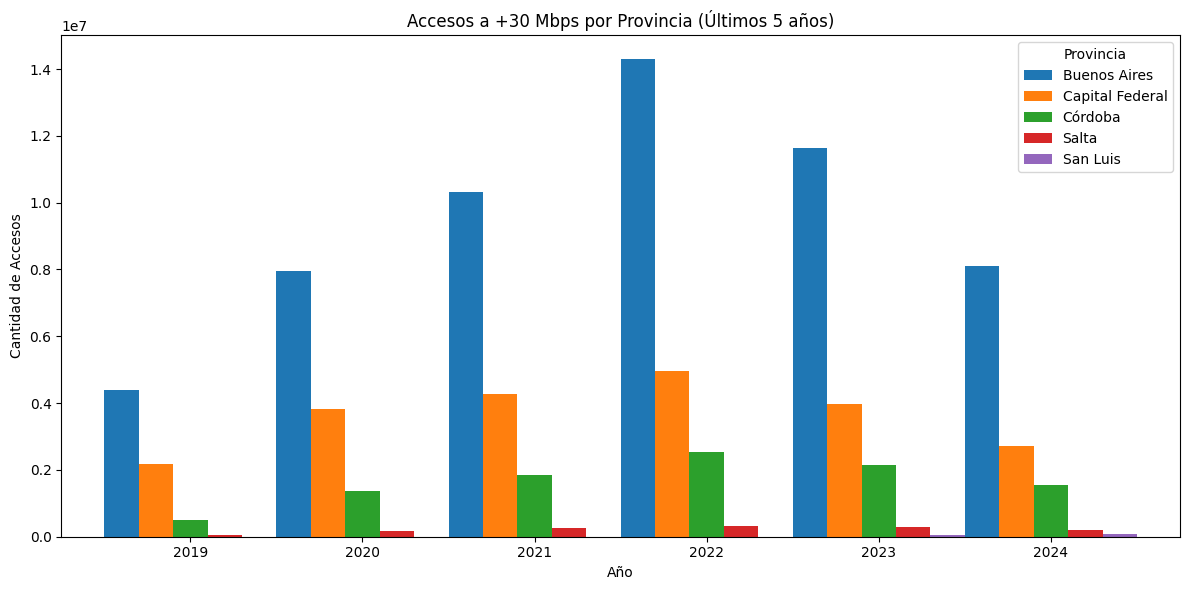

In [48]:
# Gráfico de barras agrupadas
df_bar = ultimos_5_anios.groupby(['Año', 'Provincia']).sum().reset_index()

# Filtrar algunas provincias para mayor claridad en el gráfico
provincias_interes = ['Buenos Aires', 'Capital Federal','Córdoba','San Luis','Salta']
df_bar = df_bar[df_bar['Provincia'].isin(provincias_interes)]

df_bar.pivot_table(values='+ 30 Mbps', index='Año', columns='Provincia').plot(kind='bar', width=1, figsize=(12, 6))

plt.title('Accesos a +30 Mbps por Provincia (Últimos 5 años)')
plt.ylabel('Cantidad de Accesos')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En este grafico de barra, se puede observar que en los utlimos años la provincia que lidera en uso de tecnologias que funcionan a mas de 30 mbps es la de Buenos Aires, luego Capital Federal, Cordoba, mi provincia de Salta esta muy por debajo y por ultimo San Luis.

In [51]:
hoja15_graf=pd.read_csv("Hoja15_Ingresos.csv",sep = ',')
print(hoja15_graf.head(1))
hoja15_graf.shape # Nos muestra la tupla (filas, columnas)
hoja15_graf.isnull().sum()
hoja15_graf.columns

        Fecha   Año  Trimestre  Ingresos (miles de pesos)
0  2024-01-01  2024          1               2.804191e+08


Index(['Fecha', 'Año', 'Trimestre', 'Ingresos (miles de pesos)'], dtype='object')

In [ ]:
# Filtrar los últimos 5 años
ultimo_ano = hoja15_graf['Año'].max()  
ultimos_5_anios = hoja15_graf[hoja15_graf['Año'] > ultimo_ano - 5]

# Agrupar por año y trimestre
df_agrupado = ultimos_5_anios.groupby(['Año', 'Trimestre'])['Ingresos (miles de pesos)'].sum().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado['Año'].astype(str) + "T" + df_agrupado['Trimestre'].astype(str), df_agrupado['Ingresos (miles de pesos)'], marker='o')
plt.title('Evolución de Ingresos en los Últimos 5 Años')
plt.xlabel('Año - Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()